# TASK :1 Data Loading and Exploration

In [3]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("./mnist_data.csv")

# Separate features and labels
X = df.drop("label", axis=1).values
y = df["label"].values

# Basic checks
print("Total samples:", X.shape[0])
print("Feature dimension:", X.shape[1])
print("Labels shape:", y.shape)
print("Unique labels:", np.unique(y))
print("Pixel value range:", X.min(), "to", X.max())
# Total missing values
print("Total missing values:", df.isnull().sum().sum())


Total samples: 10000
Feature dimension: 784
Labels shape: (10000,)
Unique labels: [0 1 2 3 4 5 6 7 8 9]
Pixel value range: 0 to 255
Total missing values: 0


## Visualise the MNIST images

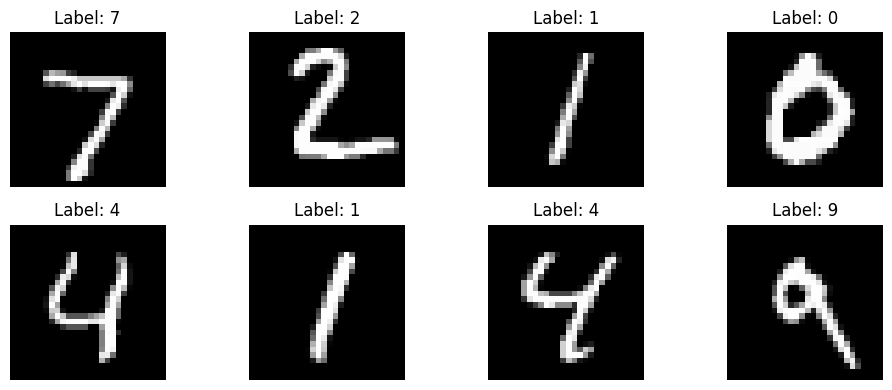

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Number of images to display
n_images = 8

plt.figure(figsize=(10, 4))

for i in range(n_images):
    image = X[i].reshape(28, 28)   # reshape to 28x28
    label = y[i]

    plt.subplot(2, 4, i + 1)
    plt.imshow(image, cmap="gray")
    plt.title(f"Label: {label}")
    plt.axis("off")

plt.tight_layout()
plt.show()


# TASK 2: Data Preprocessing

## Normalize Pixel Values

In [4]:
# Normalize pixel values to [0, 1]
X_normalized = X / 255.0

print("After normalization:")
print("Min:", X_normalized.min())
print("Max:", X_normalized.max())


After normalization:
Min: 0.0
Max: 1.0


## Train–Test Split

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_normalized,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)


Training set: (8000, 784) (8000,)
Test set: (2000, 784) (2000,)


## Prepare PCA Variants

In [6]:
from sklearn.decomposition import PCA

# PCA with 50 components
pca_50 = PCA(n_components=50, random_state=42)
X_train_pca50 = pca_50.fit_transform(X_train)
X_test_pca50 = pca_50.transform(X_test)

# PCA with 100 components
pca_100 = PCA(n_components=100, random_state=42)
X_train_pca100 = pca_100.fit_transform(X_train)
X_test_pca100 = pca_100.transform(X_test)

print("PCA 50 shape:", X_train_pca50.shape)
print("PCA 100 shape:", X_train_pca100.shape)


PCA 50 shape: (8000, 50)
PCA 100 shape: (8000, 100)


# TASK 3: Model Implementation

## Model Training (Baseline )

### Train & Evaluate KNN

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = [3, 5, 7]
knn_results = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    knn_results[k] = acc
    
    print(f"KNN (k={k}) Accuracy: {acc:.4f}")


KNN (k=3) Accuracy: 0.9550
KNN (k=5) Accuracy: 0.9475
KNN (k=7) Accuracy: 0.9430


### Train and Evaluate SVM

In [8]:
from sklearn.svm import SVC

# Linear SVM
svm_linear = SVC(kernel="linear", C=1.0)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

acc_linear = accuracy_score(y_test, y_pred_linear)
print(f"SVM (Linear) Accuracy: {acc_linear:.4f}")


# RBF SVM
svm_rbf = SVC(kernel="rbf", C=5, gamma=0.05)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

acc_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"SVM (RBF) Accuracy: {acc_rbf:.4f}")


SVM (Linear) Accuracy: 0.9270
SVM (RBF) Accuracy: 0.9680


### Train and Evaluate Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier

depths = [10, 15, 20]
tree_results = {}

for depth in depths:
    tree = DecisionTreeClassifier(
        max_depth=depth,
        min_samples_split=5,
        random_state=42
    )
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    tree_results[depth] = acc
    
    print(f"Decision Tree (max_depth={depth}) Accuracy: {acc:.4f}")


Decision Tree (max_depth=10) Accuracy: 0.8105
Decision Tree (max_depth=15) Accuracy: 0.8125
Decision Tree (max_depth=20) Accuracy: 0.8090


## PCA Experiments

### KNN with PCA(50 And 100)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k = 5  # best from baseline

# PCA 50
knn_pca50 = KNeighborsClassifier(n_neighbors=k)
knn_pca50.fit(X_train_pca50, y_train)
y_pred_pca50 = knn_pca50.predict(X_test_pca50)
acc_knn_pca50 = accuracy_score(y_test, y_pred_pca50)

# PCA 100
knn_pca100 = KNeighborsClassifier(n_neighbors=k)
knn_pca100.fit(X_train_pca100, y_train)
y_pred_pca100 = knn_pca100.predict(X_test_pca100)
acc_knn_pca100 = accuracy_score(y_test, y_pred_pca100)

print(f"KNN + PCA(50) Accuracy: {acc_knn_pca50:.4f}")
print(f"KNN + PCA(100) Accuracy: {acc_knn_pca100:.4f}")


KNN + PCA(50) Accuracy: 0.9590
KNN + PCA(100) Accuracy: 0.9545


### SVM with PCA(50 and 100)

In [11]:
from sklearn.svm import SVC

# PCA 50
svm_pca50 = SVC(kernel="rbf", C=5, gamma=0.05)
svm_pca50.fit(X_train_pca50, y_train)
y_pred_svm_pca50 = svm_pca50.predict(X_test_pca50)
acc_svm_pca50 = accuracy_score(y_test, y_pred_svm_pca50)

# PCA 100
svm_pca100 = SVC(kernel="rbf", C=5, gamma=0.05)
svm_pca100.fit(X_train_pca100, y_train)
y_pred_svm_pca100 = svm_pca100.predict(X_test_pca100)
acc_svm_pca100 = accuracy_score(y_test, y_pred_svm_pca100)

print(f"SVM + PCA(50) Accuracy: {acc_svm_pca50:.4f}")
print(f"SVM + PCA(100) Accuracy: {acc_svm_pca100:.4f}")


SVM + PCA(50) Accuracy: 0.9750
SVM + PCA(100) Accuracy: 0.9745


In [43]:
import numpy as np

# Explained variance
print("Explained variance (PCA 50):", np.sum(pca_50.explained_variance_ratio_))
print("Explained variance (PCA 100):", np.sum(pca_100.explained_variance_ratio_))


Explained variance (PCA 50): 0.8314185157799168
Explained variance (PCA 100): 0.9183657245731162


# Task 4: Model Evaluation

## Accuracy Summary

### Baseline Summary

In [41]:
import pandas as pd

baseline_summary = pd.DataFrame({
    "Model": [
        "KNN (k=3)",
        "SVM (Linear)",
        "SVM (RBF)",
        "Decision Tree (max_depth=15)"
    ],
    "Accuracy": [
        knn_results[3],          # from Step 3
        acc_linear,
        acc_rbf,
        tree_results[15]
    ]
})

baseline_summary


,Model,Accuracy
0,KNN (k=3),0.9550
1,SVM (Linear),0.9270
2,SVM (RBF),0.9680
3,Decision Tree (max_depth=15),0.8125


### PCA Experiments Summary

In [32]:
pca_summary = pd.DataFrame({
    "Model": [
        "KNN",
        "KNN",
        "SVM (RBF)",
        "SVM (RBF)"
    ],
    "PCA Components": [
        "50",
        "100",
        "50",
        "100"
    ],
    "Accuracy": [
        acc_knn_pca50,
        acc_knn_pca100,
        acc_svm_pca50,
        acc_svm_pca100
    ]
})

pca_summary


,Model,PCA Components,Accuracy
0,KNN,50,0.9590
1,KNN,100,0.9545
2,SVM (RBF),50,0.9750
3,SVM (RBF),100,0.9745


## Confusion Matrix & Misclassified Image Visualization

**Confusion Matrix**

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()


**Misclassified Image**

In [25]:
import numpy as np

def show_misclassified(X, y_true, y_pred, n_images=8):
    misclassified_idx = np.where(y_true != y_pred)[0]
    
    plt.figure(figsize=(10, 4))
    
    for i, idx in enumerate(misclassified_idx[:n_images]):
        image = X[idx].reshape(28, 28)
        plt.subplot(2, 4, i + 1)
        plt.imshow(image, cmap="gray")
        plt.title(f"True: {y_true[idx]}, Pred: {y_pred[idx]}")
        plt.axis("off")
    
    plt.tight_layout()
    plt.show()


### KNN (Baseline)

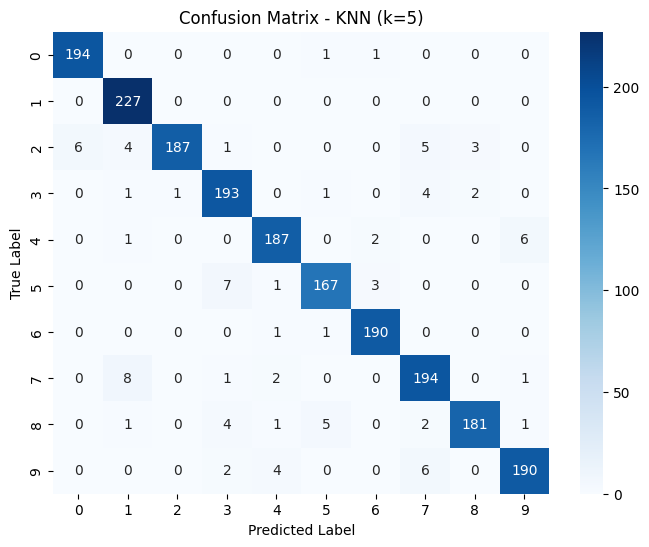

In [42]:
# KNN best model prediction (example: k=3)
knn_best = KNeighborsClassifier(n_neighbors=3)
knn_best.fit(X_train, y_train)
y_pred_knn = knn_best.predict(X_test)

plot_confusion_matrix(
    y_test,
    y_pred_knn,
    "Confusion Matrix - KNN (k=5)"
)


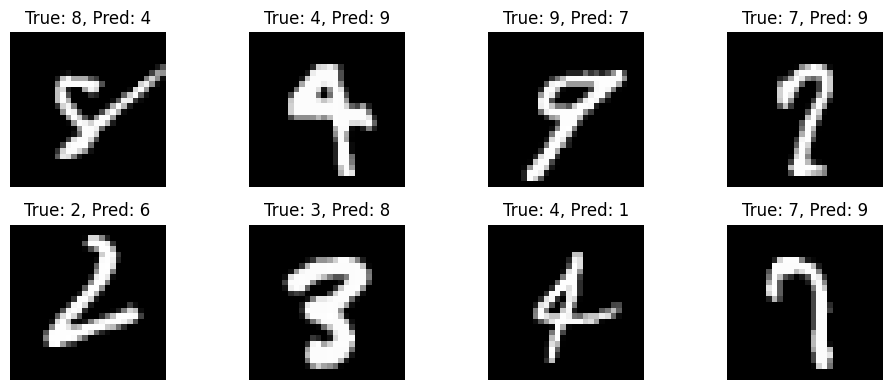

In [27]:
show_misclassified(
    X_test,
    y_test,
    y_pred_knn,
    n_images=8
)


### SVM (Linear)

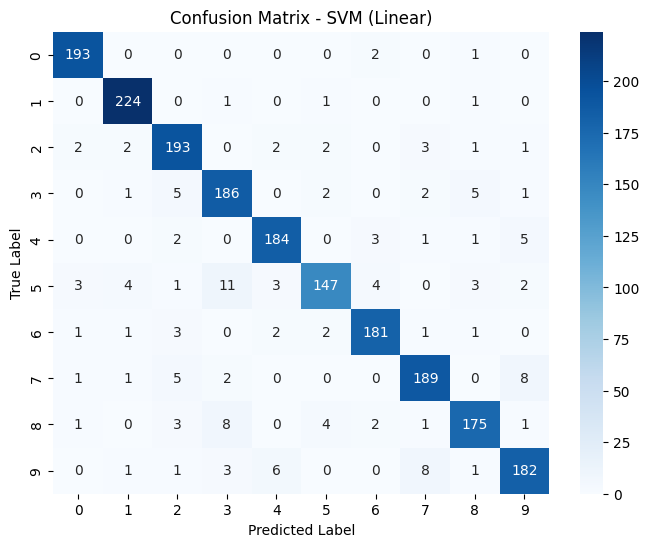

In [28]:
svm_linear = SVC(kernel="linear", C=1.0)
svm_linear.fit(X_train, y_train)
y_pred_svm_linear = svm_linear.predict(X_test)

plot_confusion_matrix(
    y_test,
    y_pred_svm_linear,
    "Confusion Matrix - SVM (Linear)"
)


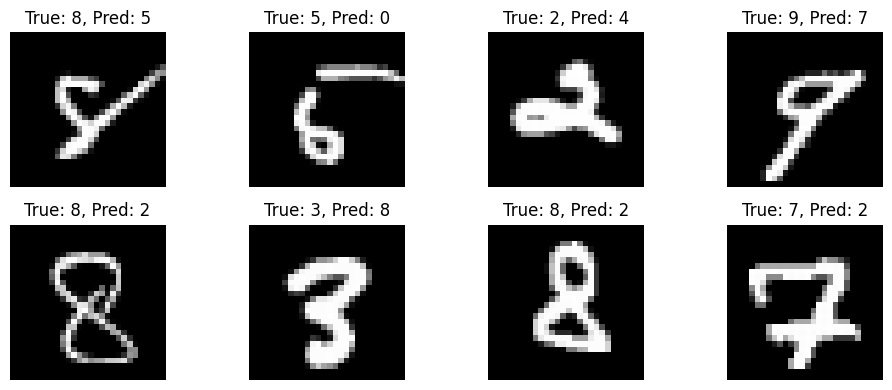

In [29]:
show_misclassified(
    X_test,
    y_test,
    y_pred_svm_linear,
    n_images=8
)


### SVM RBF

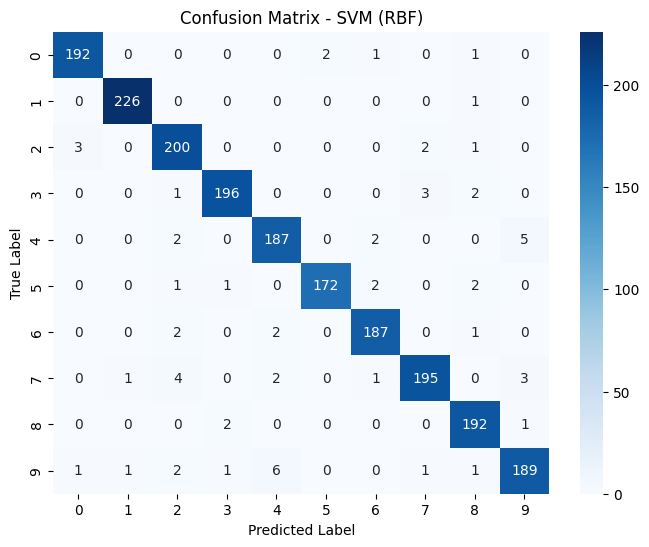

In [34]:
svm_rbf = SVC(kernel="rbf", C=5, gamma=0.05)
svm_rbf.fit(X_train, y_train)
y_pred_svm_rbf = svm_rbf.predict(X_test)

plot_confusion_matrix(
    y_test,
    y_pred_svm_rbf,
    "Confusion Matrix - SVM (RBF)"
)


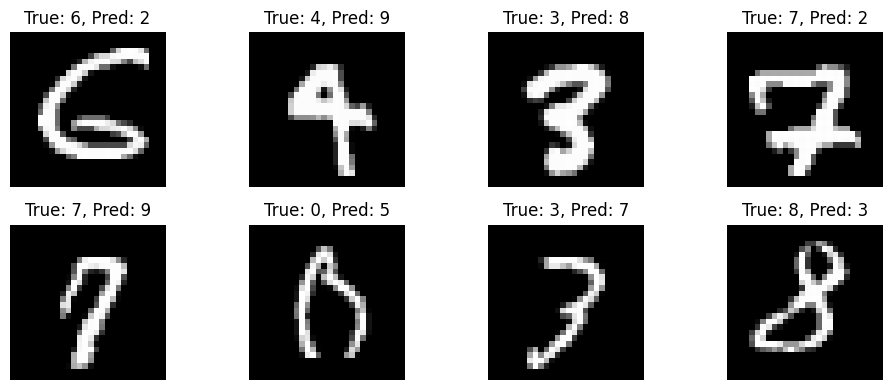

In [38]:
show_misclassified(
    X_test,
    y_test,
    y_pred_svm_rbf,
    n_images=8
)


### Decision Tree

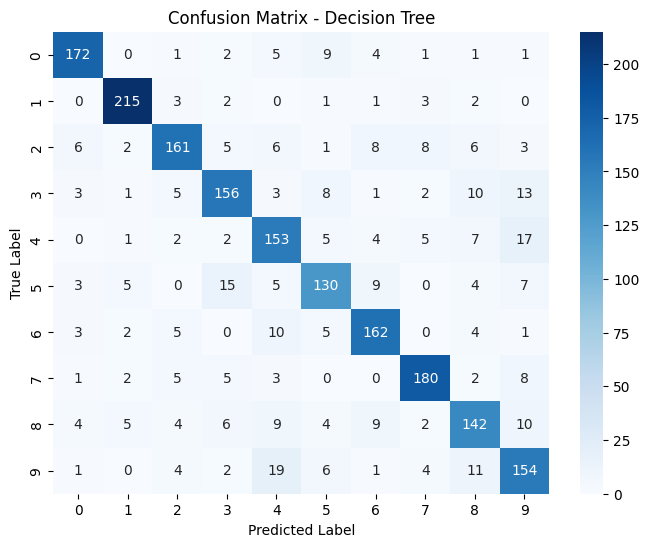

In [36]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(
    max_depth=15,
    min_samples_split=5,
    random_state=42
)

tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

plot_confusion_matrix(
    y_test,
    y_pred_tree,
    "Confusion Matrix - Decision Tree"
)


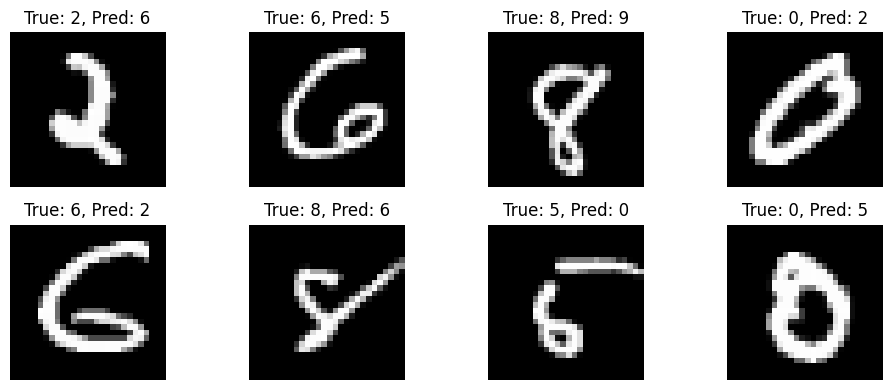

In [37]:
show_misclassified(
    X_test,
    y_test,
    y_pred_tree,
    n_images=8
)


### SVM + PCA

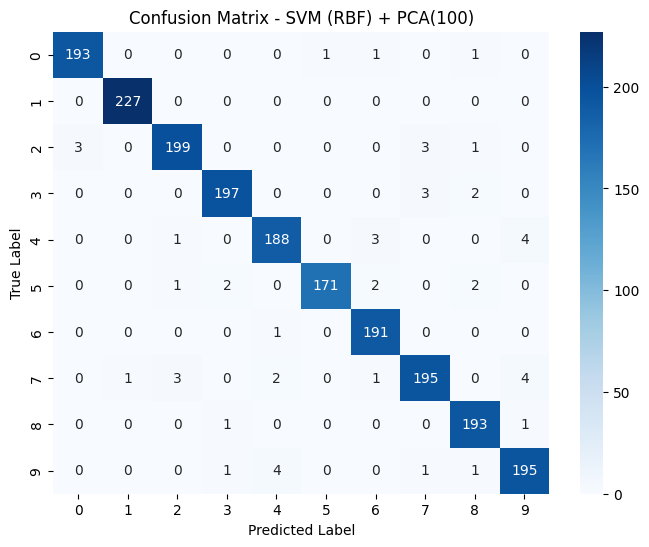

In [39]:
svm_pca = SVC(kernel="rbf", C=5, gamma=0.05)
svm_pca.fit(X_train_pca100, y_train)
y_pred_svm_pca = svm_pca.predict(X_test_pca100)

plot_confusion_matrix(
    y_test,
    y_pred_svm_pca,
    "Confusion Matrix - SVM (RBF) + PCA(100)"
)


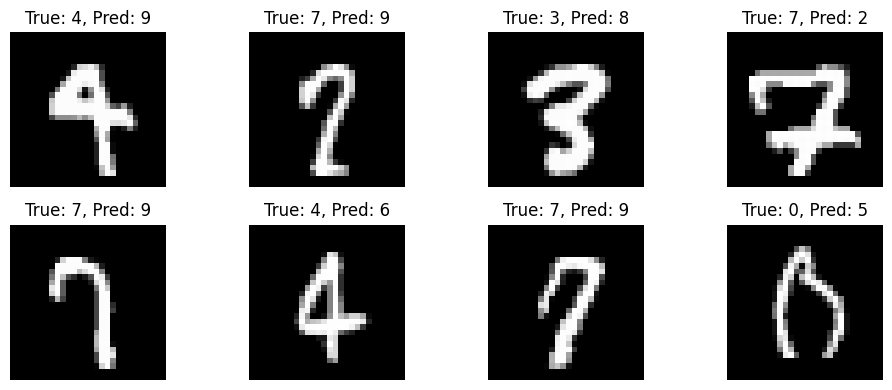

In [40]:
show_misclassified(
    X_test,
    y_test,
    y_pred_svm_pca,
    n_images=8
)


# TASK 5: Reporting

### Handwritten Digit Classification using Classical Machine Learning

#### Objective
The objective of this project is to develop a machine learning pipeline to classify grayscale images of handwritten digits (0–9) using **classical machine learning models**. The pipeline includes data loading, preprocessing, model training, evaluation, and analysis using the MNIST dataset in CSV format.

---

#### Dataset Description
- **Dataset**: MNIST handwritten digits (CSV format)
- **Samples**: 10,000 images
- **Features**: 784 grayscale pixel values (28×28 flattened)
- **Labels**: Digits from 0 to 9
- **Pixel Range**: 0–255

Each row represents one image, with a corresponding label indicating the digit.

---

#### Data Preprocessing
The following preprocessing steps were applied:
- Pixel values were **normalized to the range [0, 1]**.
- The dataset was split into **80% training and 20% testing** using stratified sampling.
- **PCA (Principal Component Analysis)** was optionally applied with 50 and 100 components to reduce dimensionality and noise.

---

#### Models Implemented
The following classical machine learning models were trained and evaluated:

1. **K-Nearest Neighbors (KNN)**
   - Tuned parameter: `k` (number of neighbors)

2. **Support Vector Machine (SVM)**
   - Linear kernel
   - RBF kernel (tuned `C` and `gamma`)

3. **Decision Tree**
   - Tuned parameters: `max_depth`, `min_samples_split`

No pre-trained models or neural networks were used.

---

#### Model Performance Comparison

The performance of classical machine learning models was evaluated using accuracy as the primary metric. Both **baseline models (without PCA)** and **PCA-based models** were compared to understand the impact of dimensionality reduction.

---

##### Baseline Model Performance (Without PCA)

| Model | Accuracy |
|------|----------|
| KNN (k = 3) | 0.955 |
| SVM (Linear) | 0.927 |
| SVM (RBF) | 0.968 |
| Decision Tree (max_depth = 15) | 0.8125 |

**Observations:**
- SVM with RBF kernel achieved the highest accuracy among baseline models.
- KNN performed competitively but slightly lower than SVM (RBF).
- Decision Tree showed significantly lower performance, indicating difficulty in generalizing from raw pixel features.

---

##### PCA-Based Model Performance

| Model | PCA Components | Accuracy |
|------|---------------|----------|
| KNN | 50 | 0.959 |
| KNN | 100 | 0.9545 |
| SVM (RBF) | 50 | **0.975** |
| SVM (RBF) | 100 | 0.9745 |

**Observations:**
- Applying PCA improved the performance of **SVM (RBF)**, with the best accuracy achieved using **50 PCA components**.
- PCA helped reduce dimensionality while preserving discriminative information, leading to better generalization.
- KNN showed marginal improvement with PCA but was sensitive to the number of components.
- Increasing PCA components beyond 50 resulted in diminishing returns.

---

##### Overall Model Ranking

1. **SVM (RBF) + PCA (50 components)** ✅ Best Performing  
2. **SVM (RBF) without PCA**  
3. **KNN (with or without PCA)**  
4. **Decision Tree**

---

##### Key Insight
> Dimensionality reduction using PCA significantly benefits margin-based models like SVM by removing redundant pixel correlations, while distance-based models such as KNN show limited gains due to sensitivity to feature compression.

---

#### Evaluation Results
- **Accuracy** was computed for each model on the test set.
- **Confusion matrices** were visualized using heatmaps to analyze class-wise performance.
- **Misclassified images** were visualized with true vs predicted labels for qualitative analysis.

Common misclassifications were observed between visually similar digits.

---

#### **Error Analysis**
- **3 ↔ 5**: Digits with curved strokes and open tops were frequently confused, especially in KNN and Decision Tree models.
- **4 ↔ 9**: Open-loop handwriting styles caused confusion, more pronounced in Decision Tree and Linear SVM.
- **7 ↔ 9**: Similar angular structures led to errors in KNN and SVM (Linear).
- **2 ↔ 7** and **2 ↔ 8**: Curved and diagonal stroke similarities resulted in occasional confusion.

##### Model-Specific Observations

- **Decision Tree** showed the highest number of off-diagonal errors. It struggled to generalize from raw pixel values and frequently confused digits such as 3, 5, 8, and 9. This indicates overfitting and sensitivity to small pixel-level variations.
  
- **KNN** performed better than Decision Tree but still showed noticeable confusion between digits like 2–7 and 7–9. Since KNN relies on pixel-wise distance, it is sensitive to noise and local distortions in handwriting.

- **SVM (Linear)** reduced some misclassifications but still struggled with non-linearly separable digit pairs such as 3–5 and 4–9, due to its linear decision boundary.

- **SVM (RBF)** significantly reduced off-diagonal errors, demonstrating strong separation of complex digit patterns. Most predictions were concentrated along the diagonal, indicating high class-wise accuracy.

- **SVM (RBF) + PCA (100)** achieved the cleanest confusion matrix overall. PCA helped remove redundant pixel correlations, further reducing confusion between similar digits while maintaining high recall across all classes.

##### Key Insights

- Errors are dominated by **handwriting style variations** rather than class imbalance.
- Models without spatial awareness struggle with digits that share stroke-level similarities.
- **Non-linear decision boundaries combined with dimensionality reduction** provide the most robust performance.

---

#### PCA Experiment Results
Applying PCA showed the following effects:
- Reduced training time, especially for SVM
- Maintained or slightly improved accuracy for KNN and SVM
- PCA with 100 components preserved more variance than PCA with 50 components

---

#### Conclusion (100–200 Words)

Among the evaluated models, **Support Vector Machine (SVM) with RBF kernel** performed the best. This is because SVM is highly effective in handling high-dimensional data such as flattened image pixels and can form complex non-linear decision boundaries. KNN also performed well but was sensitive to noise and computationally expensive for larger datasets. Decision Tree achieved lower accuracy due to overfitting and its inability to generalize effectively from raw pixel-level features.

Misclassified digits were often visually similar, such as 3 and 5 or 4 and 9, indicating that pixel-level representations alone may not fully capture structural differences in handwriting. Applying **Principal Component Analysis (PCA)** helped reduce noise and redundancy in the data, improving both efficiency and, in some cases, accuracy. Further improvements could be achieved through better hyperparameter tuning, ensemble methods, or feature extraction techniques that preserve spatial relationships.

---

#### Tools Used
- Python
- NumPy
- Pandas
- scikit-learn
- Matplotlib
- Seaborn
